# Oficina de Transição de Fase 

**Thiago Puccinelli** - USP

Contato

*email: thiagoponogueira@gmail.com*

<nav>
<a href="https://scholar.google.com/citations?user=ByvGLo4AAAAJ&hl=pt-BR">Google Scholar</a> |
<a href="https://github.com/thiagopuccinelli?tab=repositories">Github</a> |
<a href="http://lattes.cnpq.br/5068320085993516">Lattes</a> |
<a href="https://www.linkedin.com/in/thiago-puccinelli-orlandi-nogueira-b13677a9/">Linkedin</a> 
</nav>
 
 
**O que esperar ao fim dessa oficina?**

1) Compreender e executar códigos de Dinâmica Molecular; 
2) Analisar os dados obtidos através de códigos em Python; 
3) Visualizar as trajetórias das simulações usando o software gráfico Ovito; 
4) Obter o diagrama de fase Temperatura vs Densidade.

**Referências** 

1) Puccinelli, Thiago, Murilo Sodré Marques, and José Rafael Bordin. "O pacote LAMMPS como uma ferramenta para o ensino de transição de fases." Revista Brasileira de Ensino de Física 46 (2024): e20230336.
2) Frenkel, Daan, and Berend Smit. Understanding molecular simulation: from algorithms to applications. Elsevier, 2023.
3) Allen, Michael P., and Dominic J. Tildesley. Computer simulation of liquids. Oxford university press, 2017.
4) Rapaport, Dennis C. The art of molecular dynamics simulation. Cambridge university press, 2004.
5) Plimpton, Steve. "Fast parallel algorithms for short-range molecular dynamics." Journal of computational physics 117.1 (1995): 1-19.
6) Stukowski, Alexander. "Visualization and analysis of atomistic simulation data with OVITO–the Open Visualization Tool." Modelling and simulation in materials science and engineering 18.1 (2009): 015012.

<div style="text-align:center; font-weight: bold; margin-bottom: 20px; margin-top: 10px;">
    Organização
</div>

<div align="center">
    <img src="./figuras/logos.png" alt="Alt text" width="50%">
</div>

***

## Sumário  
1. [Uma visão geral da Dinâmica Molecular (DM)](#chapter1)     
    * [Equações de movimento de Newton](#section_1_1)
    * [Ilustração de como ocorre a interação](#section_1_2)
    * [Um Campo de Forças: Potencial de Lennard-Jones](#section_1_3)
    * [Algoritmo de DM](#section_1_4)
    * [Unidades Reduzidas](#section_1_5)
2. [Apresentação do Pacote de Simulação LAMMPS](#chapter2)
    * [Características do LAMMPS](#section_2_1)
    * [Comandos Básicos](#section_2_2)
    * [Script de entrada para um fluido de Lennard-Jones](#section_2_3)
    * [Análise dos dados Termodinâmicos](#section_2_4)
    * [Visualização usando OVITO](#section_2_5)
3. [Transições de Fase e Curva de Coexistência](#chapter3)
    * [Descrição do Sistema](#section3_1)
    * [Scripts de Entrada](#section_3_2)
    * [Observando a Coexistência e o Diagrama de Fases](#section_3_3)
    * [Recomendação para atividades](#section_3_4)



## 1. Uma visão geral da Dinâmica Molecular (DM) <a class="anchor" id="chapter1"></a>

A Dinâmica Molecular (DM) é uma técnica de simulação computacional que descreve o movimento de átomos ou moléculas em um determinado tempo. Ela perimite estudar problemas que envolvem sistemas com muitas partículas a partir do conhecimento das __energias potenciais de interação__ entre elas. 

Disto isso, pode-se analisar tanto propriedades de __transporte__ quanto __estruturais__ de um sistema de interesse.

### Notas:
Em simulações de DM:
- **Átomos ou Moléculas**: são tratados como partículas interagindo através de forças definidas pela energia potencial;
- **Evolução Temporal**: O sistema evolui com incremento de tempo discretos, com as posições e velocidades das partículas atualizada baseada na computação das forças de interação;
- **Temperatura, Pressão e outras propriedades**: O controle de propriedades termodinâmicas como a temperatura ou pressão é atingida através do uso de termostatos e barostatos.

### Equações de movimento de Newton <a id="section_1_1"></a>
Em DM, devemos resolver as equações clássicas de movimento de Newton para cada partícula do sistema, 

$$\mathbf{F}_i = m_{i} \mathbf{\ddot{r}}_{i} $$

onde $m_{i}$ é a massa da $i$-ésima partícula e $\mathbf{\ddot{r}}_{i}$ sua aceleração. E, 

$$ \mathbf{F}_i  = - \nabla_{\mathbf{r}_{i}}U = - \left( \frac{\partial U}{\partial x_i} \hat{\mathbf{x}} + \frac{\partial U}{\partial y_i} \hat{\mathbf{y}} + \frac{\partial U}{\partial z_i} \hat{\mathbf{z}} \right)$$

é a força resultante sobre a partícula $i$ devido às interações com as outras partículas que compõem o sistema. $U(\mathbf{r}_i)$ é a energia potencial que representa as interações do sistema de $N$ partículas e que define o Campo de Forças necessário à obtenção da força resultante.

### Ilustração de como ocorre a interação <a id="section_1_2"></a>

Abaixo, criamos uma configuração inicial, onde as partículas foram inseridas em posições randômicas. Selecionamos uma partícula no centro da caixa, e pintamos de vermelho. Primeiramente, calculamos a distância entre a partícula vermelha e as partículas vizinhas azuis. Essa distância está esquematizada pelas setas em cor preta. Obtida essa distância, calcula-se $U(\mathbf{r}_i)$ e, por conseguinte, aplica-se o gradiente dessa função para obter a força resultante sobre a partícula vermelha devido as interações com as partículas azuis. 

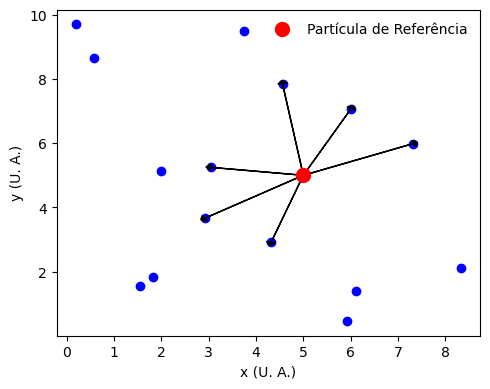

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# para sempre obter os mesmos pontos 
np.random.seed(42)

# Gerar uma configuração com 15 átomos em posições randômicas em uma caixa 10x10
num_atoms = 15
positions = np.random.rand(num_atoms, 2) * 10

# Selecionar um ponto (por exemplo, no centro)
selected_point = np.array([[5.0,5.0]])

# Calcular a distância do ponto selecionado para todos os outros
distances = np.linalg.norm(positions - selected_point, axis=1)

# Encontrar os índices dos pontos mais próximos
closest_indices = np.argsort(distances)[:6]  # Change 3 to the number of closest points you want

# Plotar a configuração
plt.figure(figsize=(5,4))
plt.scatter(positions[:, 0], positions[:, 1], c="blue", marker="o")

# Desenhar setas do ponto selecionado para os pontos mais próximos
for idx in closest_indices:
    plt.arrow(selected_point[0,0], selected_point[0,1], 
              positions[idx, 0] - selected_point[0,0], 
              positions[idx, 1] - selected_point[0,1], 
              head_width=0.2, head_length=0.1, fc='black', ec='black')

# Destacar o ponto selecionado
plt.scatter(selected_point[0,0], selected_point[0,1], c="red", marker="o", s=100, label="Partícula de Referência")

# Rotular os eixos
plt.xlabel("x (U. A.)")
plt.ylabel("y (U. A.)")
plt.tight_layout()
plt.legend(frameon=False)
plt.show()

### Um Campo de Forças: Potencial de Lennard-Jones <a id="section_1_3"></a>

Na ampla maioria das situações, visando-se reduzir o custo computacional das simulações, o Campo de Forças será um potencial efetivo entre pares de partículas que levará em conta todas as demais interações (entre tripletos, entre quadrupletos, etc), desde que consiga reproduzir os dados experimentais. Neste sentido, o potencial de Lennard Jones é capaz de descrever o comportamento de diversos sistemas. Contudo, sistemas iônicos possuem termos coulombianos no seu Campo de Forças (por conta da interação eletrostática) e a modelagem de fluidos poliatômicos exige a definição de potenciais de ligação entre as partículas que compõem cada molécula.


O principal potencial de pares utilizado para representar a interação entre as partículas de um sistema em DM é o potencial de Lennard-Jones, 

$$ U(r) = 4\epsilon \bigg[ \bigg(\frac{\sigma}{r}\bigg)^{12} - \bigg(\frac{\sigma}{r}\bigg)^{6}  \bigg], $$

onde $\epsilon$ e $\sigma$ são a profundidade do poço do potencial e o diâmetro da partícula, respectivamente. Esse potencial simples é capaz de reproduzir a força atrativa que surge devido às forças de London/forças de van der Waals que surgem pelos dipolos induzidos momentaneamente quando dois átomos começam a se aproximar e, a força repulsiva que surge a pequenas distâncias, menores que $2^{1/6}\sigma$ - como indicado na figura abaixo. Essa repulsão ocorre devido à sobreposição das nuvens eletrônicas dos átomos e, é relacionada à força de troca do princípio de exclusão de Pauli.


<div align="center">
    <img src="./figuras/fig4.jpg" alt="Alt text" width="50%">
</div>


Para facilitar a execução dos passos de DM, é conveniente estabelecer um raio de corte $r_c = 2.5\sigma$ para o potencial, assim, se as moléculas estiverem a uma distância de separação igual ou maior que $r_c$, a interação entre ambas as moléculas não será levada em consideração durante a evolução temporal do sistema, ou seja, $U(r \geq r_c) = 0$. Este potencial de interação está ilustrado pela curva de cor preta na figura acima juntamente com a força de interação (curva pontilhada vermelha) dada pelo gradiente negativo do potencial $F(r) = -\nabla_{r} U$.

A primeira observação que pode ser feita acerca desse potencial é que $\sigma$ é a distância na qual $U(r) = 0$ e $\epsilon$ é a profundidade do potencial de interação, ambos estão indicados no gráfico. Por outro lado, se fizermos $F(r) = 0$, podemos encontrar a distância de equilíbrio $r_{eq}$ (indicada no gráfico), de forma que se duas partículas encontram-se a uma distância de separação menor que $r_{eq}$, elas sentirão uma repulsão, enquanto se estiverem separadas por uma distância maior, estarão sujeitas a uma atração. Outra indicação no gráfico é a distância onde a força é máxima $r_{Fmax}$ e, nota-se que para distâncias maiores que esta, a força decresce continuamente até alcançar a distância de corte $r_c$. 


### Algoritmo de DM <a id="section_1_4"></a>

O algoritmo padrão de um programa de Dinâmica Molecular (DM) está ilustrado no diagrama abaixo. Após a leitura da configuração inicial, o próximo passo é calcular a força resultante atuante sobre cada partícula. A natureza dessa força depende do Campo de Forças adotado e, no nosso caso, utilizamos o potencial de Lennard-Jones. Para sistemas mais complexos, modelos mais elaborados são necessários. Uma vez conhecida a força resultante, podemos determinar a aceleração de acordo com a equação de Movimento. A partir deste ponto, iniciamos a integração das equações de movimento, avançando o tempo até alcançar o tempo máximo de simulação, $t_{\rm max}$. A cada incremento infinitesimal de tempo $\delta t$, conhecido como o passo de simulação, as equações de movimento são resolvidas para calcular as novas posições e velocidades de cada partícula nos instantes $t$ e $t + \delta t$. Existem várias técnicas numéricas para realizar essa integração, sendo o algoritmo de _velocity_ - Verlet um dos mais amplamente empregados. 

Para fins de simplicidade, não entraremos em detalhes sobre os aspectos específicos da integração aqui. Após essa integração das equações de movimento, um programa de DM normalmente calcula várias propriedades de interesse, como a energia do sistema, pressão, temperatura, entalpia e uma gama de outras propriedades. Além disso, é possível armazenar as trajetórias das partículas para análises posteriores e pós-processamento: através de _softwares_ específicos (como _ovito_), várias análises podem ser realizadas sobre as propriedades do sistema, a saber: possíveis transições de fase, ordem translacional e rotacional, comportamento dinâmico.

<div align="center">
    <img src="./figuras/algoritmo.jpg" alt="Alt text" width="50%">
</div>

### Unidades Reduzidas <a id="section_1_5"></a>

Em simulações de DM, é conveniente a utilização das unidades reduzidas, já que estas permitem a descrição qualitativa de uma ampla faixa de pressões e temperaturas. Através delas, pode-se escrever propriedades, tais como: a densidade, a temperatura, a pressão, assim como outras. Esse procedimento facilita, por exemplo, a execução de simulações de DM, já que lidar com constantes muito pequenas, como a constante de Boltzmann $k_B$, ao mesmo tempo com unidades muito grandes, pode levar a erros matemáticos. Além desse fato, temos uma motivação maior para tratar sistemas em unidades reduzidas, que é o fato de permitir múltiplas combinações de densidade $\rho$, temperatura $T$ e parâmetros de Lennard-Jones, como a profundidade do potencial $\epsilon$ e o diâmetro da partícula $\sigma$, que correspondem ao mesmo estado termodinâmico. Desta forma, definimos as unidades reduzidas como

$$\rho^* \equiv \rho \sigma^3,\;\; \ T^*\equiv T \frac{k_B}{\epsilon} \ \;\text{e}\; \  p^*\equiv \frac{p\sigma^3}{\epsilon}$$

Por exemplo, para uma dada simulação com densidade $\rho^*= 1.0$ e temperatura $T^*= 1.0$ e $p^* = 1.0$, se convertermos essas unidades reduzidas em unidades reais (usando as Equações acima), e utilizando os parâmetros para o caso do elemento Argônio $\epsilon/k_B = 119.8$ K, $\sigma = 3.405 \times 10^{-10}$ m, respectivamente. Temos um sistema a uma densidade $\rho = 1680$ kg/m3, uma temperatura $T = 119.8$ K e pressão $p = 41.9$ MPa. Dessa forma, confere-se aos resultados obtidos nas simulações de DM uma dada universalidade. Por simplicidade, iremos omitir em nossas notações o símbolo $*$ (indicativo de unidades reduzidas), sem qualquer perda de generalidade. 

## 2. Apresentação do Pacote de Simulação LAMMPS <a id="chapter2"></a>

O LAMMPS é um código clássico de DM que modela sistemas atômicos, poliméricos, biológicos, de estado sólido (metais, cerâmicas, óxidos), granulares, _coarse-grained_ ou macroscópicos, utilizando uma variedade de potenciais interatômicos (campos de força) e condições de contorno. Ele pode modelar sistemas bidimensionais ou tridimensionais com tamanhos que vão desde apenas algumas partículas até bilhões.

No sentido mais geral, o LAMMPS integra as equações de movimento de Newton para um conjunto de partículas que interagem entre si. Uma partícula pode ser um átomo, uma molécula ou um elétron, um aglomerado de átomos _coarse-grained_, ou um aglomerado de material mesoscópico ou macroscópico. Os modelos de interação que o LAMMPS inclui são, na sua maioria, de curto alcance; Entretanto, também estão incluídos alguns modelos de longo alcance. Esse pacote de simulações é distribuído gratuitamente pelos laboratórios Sandia, através do link (https://www.lammps.org/).


### Características do LAMMPS <a id="section_2_1"></a>

- **Modular Structure**: Ele tem um _design_ modular, o que permite usuários adicionarem funcionalidades com pagotes e _plugins_. 
- **Script de Entrada**: As simulações com o LAMMPS são controladas por scripts de entrada que definem, por exemplo: a caixa de simulação, os átomos, as interações e configurações da simulação.
- **Saída**: Propriedades termodinâmicas, instantâneos das posições dos átomos e quantidades calculadas são salvos em arquivos de saída especificados para pós-processamento.


### Comandos Básicos <a id="section_2_2"></a>

Principais comandos de script de entrada LAMMPS:
- `units`: Define as unidades (por exemplo, `metal` para metais, `real` para biomoléculas).
- `atom_style`: Especifica o tipo de partículas, como `atomic`, `charge`, `full`.
- `region` e `create_box`: Definem a região e a criação da caixa de simulação.
- `pair_style` e `pair_coeff`: Define o potencial de interação e seus parâmetros.


### Script de entrada para um fluido de Lennard-Jones <a id="section_2_3"></a>



Na pasta `ex1`, temos um script de entrada para um fluido de Lennard-Jones com densidade $\rho = 0.8$, inserido em uma caixa em 3D. Iremos realizar uma equilibração à temperatura constante e, depois, uma rodada para coletar a energia cinética e potencial. Esses dados serão salvos no arquivo `thermo_output.dat`. 

In [2]:
%%writefile ex1/run.lmp
###### declaração de variáveis 
variable rho equal 0.8
variable npart equal 1000 
variable Lbox equal (${npart}/${rho})^(1./3.)
variable Lbox2 equal ${Lbox}*0.5 

######## configurações da simulação 
units lj 
dimension 3 
atom_style atomic 
neighbor 0.3 bin
neigh_modify every 10 delay 10 check yes 
timestep 0.01

######## Definição da caixa de simulação 

region box block -${Lbox2} ${Lbox2} -${Lbox2} ${Lbox2} -${Lbox2} ${Lbox2}
create_box 1 box 
create_atoms 1 random ${npart} 57679 box

mass 1 1.0 

####### Definição do campo de forças 

pair_style lj/cut 2.5 
pair_coeff 1 1 1.0 1.0 

####### Minimização para retirar possíveis overlaps 
min_style cg
minimize 0.0 1.0e-8 1000 100000

####### Definir a dinâmica e termostato 

fix mydyn all nve 
fix mylang all langevin 1.0 1.0 1.0 71724 

##### dados termodinâmicos 
thermo_style custom step temp ke pe etotal press density
thermo 1000

run 10000 #### equilibração

compute enpot all pe #### calcular a energia potencial 
compute enkin all ke #### calcular a energia cinética

dump mydump all custom 100 traj.lammpstrj id type x y z vx vy vz 
#### salvar a energia cinética e potencial em um arquivo thermo_output.dat
fix mythermo all ave/time 100 1 100 c_enkin c_enpot  file thermo_output.dat 


run 10000 #### produção de resultados 



Overwriting ex1/run.lmp


### Análise dos dados Termodinâmicos <a id="section_2_4"></a>

Com os dados termodinâmicos coletados, tanto a energia cinética, quanto a energia potencial. Iremos carregar ambos o dados nas variáveis `enkin` e `enpot`, respectivamente. 

In [3]:
import numpy as np

steps, enkin, enpot = np.genfromtxt("ex1/thermo_output.dat",usecols=(0,1,2),unpack=True)


Em seguida, podemos plotar ambas as energias em função da evolução da simulação. Desta forma, podemos analisar se a nossa simulação está bem equilibrada. 

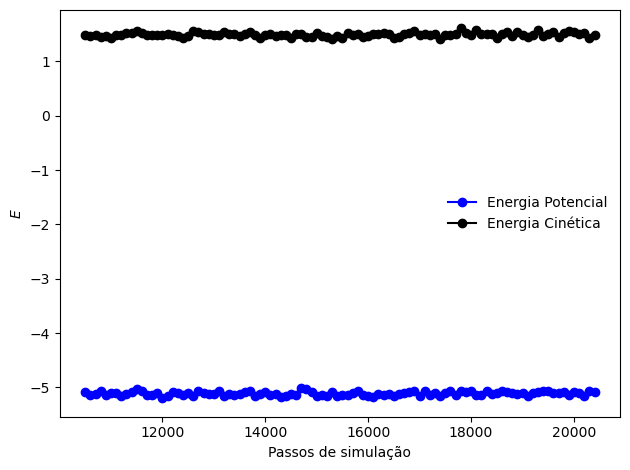

In [4]:

plt.figure()

plt.plot(steps,enpot/1000,"bo-",label="Energia Potencial")
plt.plot(steps,enkin/1000,"ko-",label="Energia Cinética")

plt.legend(loc="best",frameon=False)
plt.xlabel(r"Passos de simulação")
plt.ylabel(r"$E$")
plt.tight_layout()
plt.show()


### Visualização usando OVITO <a id="section_2_5"></a>

Para visualizar a trajetória da simulação iremos utilizar o _software_ Ovito. Isso será realizado através da linha de comando abaixo via terminal. 

In [5]:
!ovito ex1/traj.lammpstrj

/bin/bash: line 1: ovito: command not found


## 3. Transições de Fase e Curva de Coexistência <a id="chapter3"></a>

As transições de fase são fenômenos físicos que ocorrem quando uma substância passa por uma alteração em seu estado de agregação, como da fase líquida para a fase gasosa (por exemplo, ao fervermos a água), ou da fase sólida para a fase líquida (quando o gelo derrete). Tais mudanças de fase são governadas por propriedades termodinâmicas e ocorrem em temperaturas específicas para diferentes valores de pressão, pelos quais o sistema está sujeito. Para entender esse conceito, é útil explorar a transição e coexistência líquido-gás da água, um fenômeno que encontramos com frequência em nosso cotidiano.

Evidenciando a transição de fase líquido-gás, a qual ocorre quando a água muda de seu estado líquido para o estado gasoso, vê-se que tal fenômeno é influenciado pela temperatura e pressão, de acordo com os seguintes passos:

- Aquecimento da água: inicialmente, a água está no estado líquido. Quando aquecida, suas moléculas ganham energia cinética, o que as faz vibrar mais rapidamente, separando-se umas das outras.

- Atingindo o Ponto de Ebulição: para o caso de sistemas fechados, como por exemplo a água dentro de uma panela com uma tampa bem vedada, à medida que a temperatura aumenta, a energia cinética das moléculas da água também aumenta até atingir uma temperatura específica, o equilíbrio é atingido quando a pressão da fase líquida se iguala a pressão de vapor, conhecida como ponto de ebulição. Como estamos injetando calor ao sistema continuamente, essa energia adicionada é utilizada para superar as forças intermoleculares de atração que mantêm as moléculas de água juntas como um líquido, aumentando a distância entre as mesmas. Portanto, a energia adicionada durante a fervura contribui tanto para a energia cinética das moléculas (à medida que se movem mais rapidamente) quanto para a energia potencial do sistema (à medida que as forças intermoleculares são superadas), desta forma ocorre a transição da substância de um estado líquido para um estado gasoso. Especificamente, para a água ao nível do mar e a uma pressão atmosférica normal, o ponto de ebulição é de 100 graus Celsius (ou 373K). Neste ponto, é importante relembrar que para sistemas abertos, como é o caso de uma poça de água ou roupa molhada secando sob o sol, ocorre o processo de evaporação, abaixo desse ponto de ebulição. Na evaporação apenas as moléculas na superfície do líquido escapam para o ar e, mesmo a temperaturas muito baixas como em dias frios de inverno, algumas moléculas na superfície da água ainda têm energia suficiente para evaporar, tal que taxa de evaporação também é influenciada por fatores como a umidade relativa do ar, a superfície de contato, o movimento do ar sobre a poça (ventilação), e a pressão atmosférica. Em condições de baixa umidade, alta ventilação e pressão atmosférica normal, a evaporação ocorre mais rapidamente.

Durante a transição de fase, há um equilíbrio entre a fase líquida e a fase gasosa. Isso significa que, mesmo que parte da água tenha se transformado em vapor, ainda haverá uma parte remanescente no estado líquido. Tal coexistência é fundamental, sendo representada pela curva de coexistência - uma representação gráfica das condições de temperatura e pressão (ou pressão e densidade, ou temperatura e densidade, etc) em que duas fases diferentes de uma substância podem coexistir em equilíbrio. No caso da água, a curva de coexistência entre a fase líquida e a fase gasosa é bem conhecida, como mostrado na figura abaixo. Os pontos que formam essa curva, e que separam a região líquida da região gasosa, representam as condições em que a água está passando por uma transição de fase. Se você estiver abaixo dessa linha no diagrama de fases a água estará no estado gasoso; se estiver acima, estará no estado líquido. Isso permite entender como a água pode coexistir nas duas fases, dependendo da temperatura e pressão, sobre os pontos da linha de transição (ou de coexistência). Essa linha termina no Ponto Crítico (PC): acima destes valores de temperatura e pressão, as duas fases se tornam indistinguíveis. 

<div align="center">
    <img src="./figuras/fig1.jpg" alt="Alt text" width="50%">
</div>

Voltando à linha de coexistência em um diagrama Pressão $P$ e Temperatura $T$ (conforme ilustrado na figura acima), temos que, para cada ponto contido nessa linha, haverá dois valores de volume, ou densidade, para um mesmo valor de temperatura e pressão. Outra forma útil de representar o sistema é, então, através de isotermas em um diagrama Pressão $P$ e volume $V$, como ilustrado na figura (a) abaixo. Nesse diagrama, ao invés de haver uma curva de coexistência, teremos uma região de coexistência delimitada pela curva em cor vermelha, como se pode ver. As curvas, que se iniciam a altas pressões e baixos volumes correspondendo à fase líquida (ver seta preta à esquerda), atravessam a região de coexistência e, terminam a baixas pressões e altos volumes correspondendo à fase de gás (ver seta preta à direita). Essas curvas representam isotermas, ou seja, os pontos contidos nelas são de mesma temperatura. Além disso, a região de coexistência é delimitada acima por um ponto de inflexão (ver seta vermelha), ou o ponto crítico. Além disso, na região de coexistência (ver área em vermelho), o sistema apresenta patamares no espaço $p$-$V$. Tais patamares, de pressão e temperatura constantes, indicam os dois valores de volume que o sistema ocupa: um menor, correspondente à fase líquida, e outro maior, correspondente à fase gasosa. Assim, nessa região, teremos ambas as fases líquido e gás coexistindo para uma mesma dada temperatura e pressão.

<div align="center">
    <img src="./figuras/fig2.jpg" alt="Alt text" width="50%">
</div>

O ponto crítico, como vimos, caracteriza-se por uma inflexão no diagrama $P$ - $V$, assinalando o término da região de coexistência. É interessante examinar a maneira como as densidades do líquido e do vapor se aproximam uma da outra, tornando-se idênticas no ponto crítico. Desta forma poderemos introduzir a noção de expoentes críticos, e para isso iremos assumir que a diferença entre as densidades líquido e vapor se anulem no ponto crítico de acordo com a lei de potência:

$$ \rho_l - \rho_v \approx (T_c - T)^\beta , $$

onde $\rho_l$, $\rho_v$, $T_c$ e $T$ são a densidade da fase líquida, densidade da fase vapor, temperatura crítica e temperatura, respectivamente. Ao supor essa aproximação, podemos reescrever a equação acima multiplicando $(T_c - T)^\beta$ por uma constante de proporcionalidade:

$$ \rho_l - \rho_v = A(T_c - T)^\beta. $$

A análise do comportamento ao redor do ponto crítico, onde as densidades do líquido e do vapor se aproximam, tornando-se idênticas, foi apresentada por Guggenheim, em 1945, quando publicou originalmente o diagrama de onde retiramos os dados apresentados na figura (b) acima. Tal resultado é um diagrama Temperatura $T$ e densidade $\rho$ e, assim como o diagrama $P$ - $V$, ele apresenta uma região de coexistência das fases líquidas e vapor quando analisamos a variação da temperatura com a densidade ao longo de curvas de pressão constante (isóbaras). Ajustando a equação acima a estes resultados, e utilizando o expoente crítico experimental $\beta = 0.35$, pode-se estimar a temperatura crítica $T_c$. Por outro lado, é possível também obter a densidade crítica; para isso, usa-se a regra de média Caillet-Mathias, ou a lei do diâmetro retilíneo, segundo a qual, ao redor de um ponto crítico, a média aritmética entre ambas as densidades, líquido e vapor, é linear com a temperatura crítica. Desta forma, podemos escrever,

$$ \frac{\rho_l + \rho_v}{2} = \rho_c + B(T_c - T), $$ 

onde $\rho_c$ e $B$ são a densidade crítica e um parâmetro ajustável, respectivamente. Ajustando os resultados ilustrados na figura (b) acima à equação acima, pode-se, então, estimar o valor da densidade crítica. Vale ressaltar que essa regra deixa de ser válida muito próxima do ponto crítico e outros métodos devem ser utilizados.  


### Descrição do Sistema <a id="section_3_1"></a>

A metodologia consiste em introduzir em uma caixa de simulação de tamanho fixo $L$, um número $N$ de partículas, de forma a ter uma densidade $\rho$ líquida alta a uma dada temperatura $T$ fixa não tão grande de maneira a ultrapassar a temperatura crítica $T_c$ do sistema (aquela temperatura a partir da qual as fases líquida e gasosa serão indistinguíveis). Em seguida, aumenta-se um dos lados da caixa cúbica, normalmente na direção $z$, centralizando a fase líquida entre $-L_z/2\;e\;L_z/2$, de forma a se ter uma caixa paralelepípeda, como ilustrado na figura abaixo

<div align="center">
    <img src="./figuras/fig5.jpg" alt="Alt text" width="50%">
</div>

Com o sistema pronto, realiza-se equilibrações a $T$ fixa, permitindo que algumas partículas se libertem da fase líquida e comecem a povoar os espaços vazios da caixa. Como a região densa está centralizada na origem da caixa, ela ocupa os espaços entre $-10\sigma$ e $10\sigma$ na direção x, entre $-10\sigma$ e $10\sigma$ na direção y, e entre $-10\sigma$ e $10\sigma$ na direção z. A partir do momento que partículas passam a ocupar posições maiores que $10\sigma$ e menores que $-10\sigma$ na direção z, é possível observar a coexistência das fases vapor e líquido. Para estimar as densidades líquido $\rho_l$ e vapor $\rho_v$, calcula-se o perfil de densidade ao longo do eixo z da caixa; assim, se definem as regiões correspondentes às fases de baixa e alta densidade. Em seguida, faz-se um ajuste com a seguinte função sigmoide

$$ \rho(z) = \frac{1}{2} ( \rho_l + \rho_v ) - \frac{1}{2} ( \rho_l - \rho_v ) \tanh{\bigg( \frac{z - z_0}{d} \bigg)}, $$ 

onde $\rho_l$, $\rho_v$, $z_0$ e $d$ são parâmetros ajustáveis. Os dois últimos parâmetros correspondem à posição da interface vapor-líquido e à espessura da mesma, respectivamente. Vale ressaltar que a espessura interfacial $d$ é uma terminologia cuja referência se faz à distância entre dois pontos específicos, normalmente associados a uma interface ou à fronteira entre duas fases. Neste caso, é uma medida com dimensão de distância $\sigma$. Para melhor ilustrar, pode-se utilizar o exemplo da interface entre água e óleo. Se temos um tanque com tal mistura, ao se medir a espessura da interface onde ambos se encontram, estaremos medindo a distância entre os pontos onde a concentração de óleo é de $10\%$ e $90\%$ do total. Tal medida nos ajuda a entender o quão misturadas estão as substâncias. Se a espessura da fronteira é grande, isso significa que o óleo e a água não estão bem misturados, entretanto se a espessura é pequena, isso indica uma boa mistura. Então, em resumo, quando falamos sobre a espessura interfacial, estamos simplesmente medindo o quão espessa é a camada onde duas substâncias se encontram e, para entender o quão bem misturadas elas estão. Após definidas as densidades da fase líquida e da fase de vapor, podemos utilizar a diferença entre elas e ajustar nossos resultados para obter a temperatura crítica $T_c$ do sistema. Além disso, através da lei dos diâmetros retilíneos, mencionada anteriormente, podemos estimar o valor da densidade crítica $\rho_c$ através de mais um ajuste de curva. Seguindo todos esses passos, obtendo os valores de $\rho_l$, $\rho_v$, $T_c$ e $\rho_c$, pode-se construir o diagrama de fases $T \times \rho$.



### Scripts de Entrada <a id="section_3_2"></a>

Nesta parte da oficina, iremos realizar uma simulação a temperatura constante do sistema descrito na seção anterior. Apartir da configuração inicial gerado pelo script `run1.lmp`, iremos aumentar a temperatura até $T = 1.0$ no script `run2.lmp`, com o objetivo de visualizar a coexistência líquido-gás. Ambos os códigos pode ser encontrados na pasta `ex2`, mas estão ilustrados abaixo. 

- Geração da configuração inicial: 

In [6]:
%%writefile ex2/run1.lmp
######## configurações da simulação  
units       lj
dimension   3
boundary    p p p
atom_style  atomic 
neighbor  0.5 bin
neigh_modify  every 10 delay 0
timestep      0.001

######## Definição da caixa de simulação 
region box block -5.386086725079709 5.386086725079709 -5.386086725079709 5.386086725079709 -5.386086725079709 5.386086725079709
create_box 1 box  
create_atoms 1 random 1000 30349 box 
mass * 1.0 

####### Definição do campo de forças 

pair_style  lj/cut 2.5 
pair_coeff 1 1 1.0 1.0 


####### Minimização para retirar possíveis overlaps 
min_style cg
minimize 0.0 0.0 1000 10000


####### Definir a dinâmica e termostato 

fix mydyn all nve 
fix mylang all langevin 0.5 0.5 1.0 71724 

##### dados termodinâmicos 
thermo_style  custom step pe ke temp press density lx ly lz
thermo        1000

run           10000 ##### equilibração

####### aumento da caixa no eixo-z em 6 vezes Lz 
group none empty
change_box none z final -16.15826017523913 16.15826017523913  

##### escrever o arquivo de configuração 
write_data out_0.5.data nocoeff 

Overwriting ex2/run1.lmp


- Aumento da temperatura de 0.5 para 1.0 e captura dos instantâneos de simulação:

In [7]:
%%writefile ex2/run2.lmp

###### declaração de variáveis 
variable t equal 1.0 

######## configurações da simulação   
units       lj
dimension 3 
atom_style atomic 
neighbor 0.3 bin
neigh_modify every 10 delay 10 check yes 
timestep 0.01

######## Leitura da configuração inicial 
read_data out_0.5.data

mass 1 1.0 

####### Definição do campo de forças 
pair_style  lj/cut 2.5 
pair_coeff 1 1 1.0 1.0 
 

####### Definir a dinâmica e termostato
fix fxstandard all nve
fix fxlange all langevin $t $t 1.0 265358

fix myrec all recenter INIT INIT INIT units box 

##### dados termodinâmicos 
thermo_style  custom step pe ke temp press density lx ly lz
thermo        1000 

##### salvar trajetória 
dump img all custom 100 traj.lammpstrj id type x y z vx vy vz 

run 20000 ##### rodada 



Overwriting ex2/run2.lmp


- Para visualização da trajetória via OVITO:

In [8]:
!ovito ex2/traj.lammpstrj

/bin/bash: line 1: ovito: command not found


### Observando a Coexistência e o Diagrama de Fases <a id="section_3_3"></a>

Nessa seção, iremos aplicar tudo que vimos e simular o sistema para várias temperaturas, e assim, coletar o perfil de densidade para ajustar com a função sigmoide apresentada anteriormente. O arquivo `results.dat` já contem os dados obtidos para uma simulação feita com $N = 6000$ partículas. Desta forma, usamos o script abaixo para coletar esses dados e os ajustar para obter a temperatura crítica e densidade crítica. Munidos com essas informações, é possível plotar o diagrama de fase $T$ x $\rho$.  

temperatura critica =  1.1705960042263857 densidade critica =  0.2769928376732834


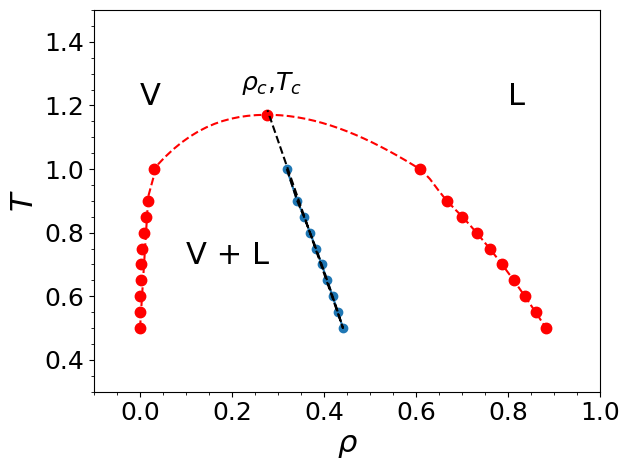

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import interpolate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d, CubicSpline,pchip_interpolate

def func1(x,C,B):
    return B - C*x  

def func2(x,C,B):
    return x/C - B/C 

def func(x,a,b):
    return a*x + b



data = np.genfromtxt("ex3/results.dat")

beta = 0.325
rhol = data[:,1]
rhov = data[:,2]
temps = data[:,0]

y = rhol - rhov 
y = y ** (1./beta)

popt,pcov = curve_fit(func1,temps, y)
A = popt[0]
B = popt[1]
Tc = B/A 

y = 0.5*(rhol + rhov)
popt,pcov = curve_fit(func,Tc - temps,y)
A = popt[0]
rhoc = popt[1]


func = interp1d(y,temps,fill_value="extrapolate")

newx = np.concatenate((np.flip(y),[rhoc]))

criticalT = [Tc]
criticalrho = [rhoc]

print("temperatura critica = ", Tc, "densidade critica = ", rhoc)

plt.figure()
rho = np.concatenate((data[:,2],[rhoc],np.flip(data[:,1])))
newT = np.concatenate((data[:,0],[Tc],np.flip(data[:,0])))

plt.plot(rho,newT,marker="o",ms="7.5",ls="none",color="red")
plt.plot(y,temps,marker="o")
plt.plot(newx,func(newx),ls="--",color="black")

# região de coexistência 
newrho = np.linspace(rho.min(), rho.max(), 50)
y = cubic_interpolation_model = pchip_interpolate(rho, newT, newrho)

plt.plot(newrho,y,ls="--",color="red")

plt.text(0.1, 0.7, r'V + L', fontsize = 22)
plt.text(0., 1.2, r'V', fontsize = 22)
plt.text(0.8, 1.2, r'L', fontsize = 22)
plt.text(0.22, 1.25, r'$\rho_c$,$T_c$', fontsize = 18)

plt.ylim(0.3,1.5)
plt.xlim(-0.1,1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.minorticks_on()
plt.xlabel(r"$\rho$",fontsize=22)
plt.ylabel(r"$T$",fontsize=22)
plt.tight_layout()

plt.show()

### Recomendação para atividades: <a id="section_3_4"></a> 

- Obter os resultados da diagrama de fase anterior:
    - Usar os códigos na pasta `ex3` para executar a simulação;
    - Fitar a função sigmoide e encontrar os dados salvos no arquivo `results.dat`;
    - Fazer todo o tratamento de análise anterior; 
    - Plotar o diagrama; 
    - Observar através do _software_ Ovito os instantâneos gerados.